<a href="https://colab.research.google.com/github/Comp-Soc-Science-Methods/HW1/blob/main/code_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###### package installation

!conda install --channel conda-forge geopandas

!conda create -n geo_env
!conda activate geo_env
!conda config --env --add channels conda-forge
!conda config --env --set channel_priority strict
!conda install python=3 geopandas

import geopandas as gpd

url = "https://github.com/DACSS-CSSmeths/Spatial-Exploring/raw/refs/heads/main/maps/countriesCIA.gpkg"

# read the Geopackage into a GeoDataFrame
countriesCIA = gpd.read_file(url)

#layers of the geopackage
print(countriesCIA)

layers = gpd.read_file(url, layer=None)
print(layers)

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'countriesCIA.gpkg': 'cia' (default), 'border'. Specify layer parameter to avoid this warning.
  result = read_func(


         COUNTRY         name                   region  obesityAdults_rate  \
0    Afghanistan  Afghanistan               South Asia                 5.5   
1        Algeria      Algeria                   Africa                27.4   
2     Azerbaijan   Azerbaijan              Middle East                19.9   
3        Albania      Albania                   Europe                21.7   
4        Armenia      Armenia              Middle East                20.2   
..           ...          ...                      ...                 ...   
142      Namibia      Namibia                   Africa                17.2   
143        Yemen        Yemen              Middle East                17.1   
144       Zambia       Zambia                   Africa                 8.1   
145     Zimbabwe     Zimbabwe                   Africa                15.5   
146    Indonesia    Indonesia  East and Southeast Asia                 6.9   

     TobaccoUse_perc  Alcohol_LitersPerCap  tobacco_code tobacc

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'countriesCIA.gpkg': 'cia' (default), 'border'. Specify layer parameter to avoid this warning.
  result = read_func(


In [7]:
!pip install mapclassify

import mapclassify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # importing matplotlib for plotting

obesity = countriesCIA['obesityAdults_rate']
print(obesity.head())

# number of bins
K = 5

np.random.seed(12345)

# different classification methods
ei5 = mapclassify.EqualInterval(obesity, k=K)
msd = mapclassify.StdMean(obesity)
q5 = mapclassify.Quantiles(obesity, k=K)
mb5 = mapclassify.MaximumBreaks(obesity, k=K)
fj5 = mapclassify.FisherJenks(obesity, k=K)
jc5 = mapclassify.JenksCaspall(obesity, k=K)
mp5 = mapclassify.MaxP(obesity, k=K)
ht = mapclassify.HeadTailBreaks(obesity)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.7 MB/s eta 0:00:00
0     5.5
1    27.4
2    19.9
3    21.7
4    20.2
Name: obesityAdults_rate, dtype: float64


In [13]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

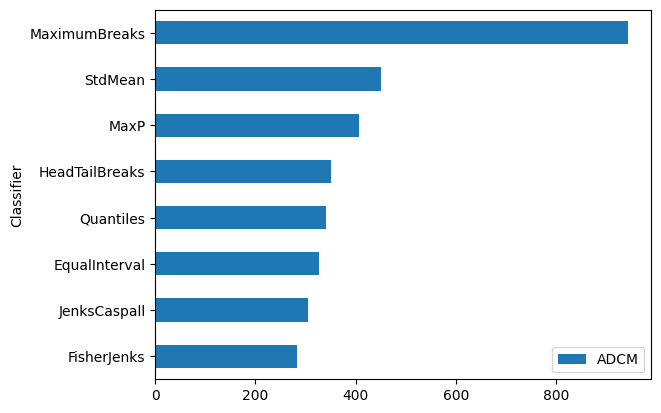

In [15]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')
plt.show();
## we can see that Fisher Jenks is the best scheme and will use this for alcohol and tobacco as well

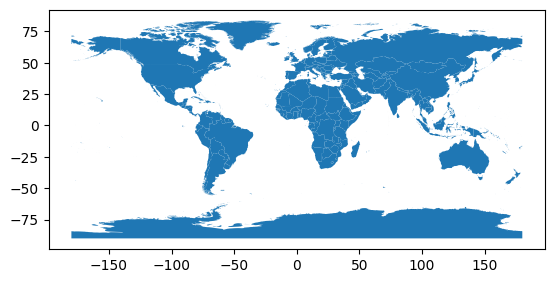

In [19]:
## reading in map from Github and plotting
mainLocation='https://github.com/DACSS-CSSmeths/Spatial-intro/raw/refs/heads/main/maps/'
linkCountriesSHP=mainLocation+"shapefile/World_Countries/World_Countries.shp"

countries=gpd.read_file(linkCountriesSHP)
countries.plot()

## creating a map of the borders
worldBorders=countries.dissolve()

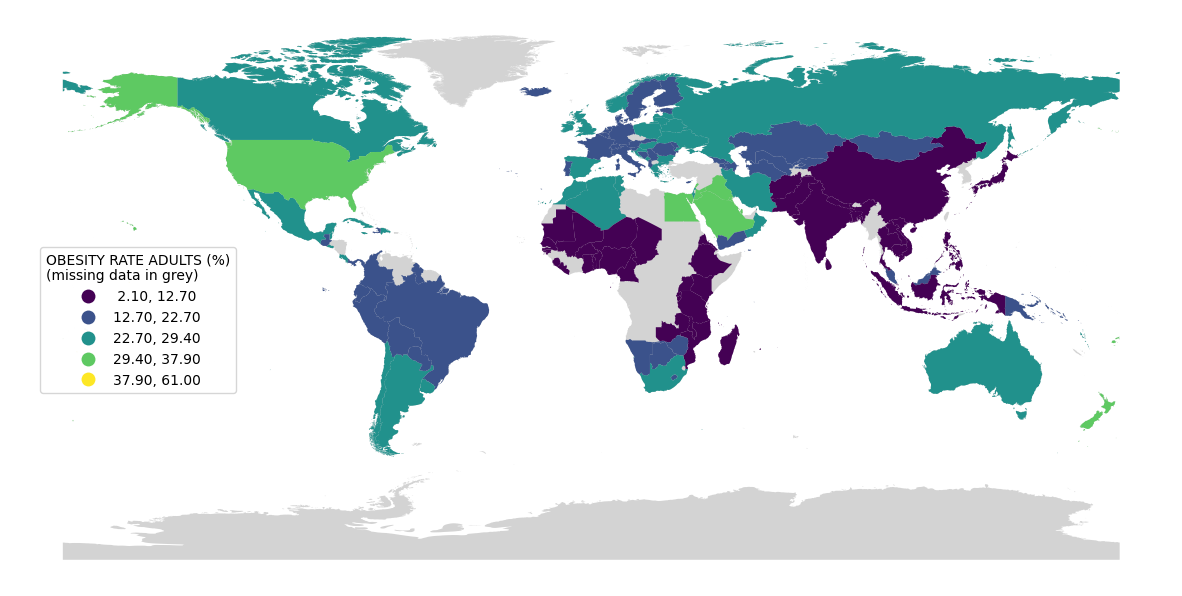

In [20]:
base=worldBorders.plot(color='lightgrey',
                     figsize=(15, 10))
countriesCIA.plot(column='obesityAdults_rate', cmap='viridis', ax=base,
                     scheme="fisher_jenks",
                     linewidth=0.,
                     legend=True,
                     legend_kwds={"title": "OBESITY RATE ADULTS (%)\n(missing data in grey)"}
                   )
leg = base.get_legend()
leg.set_bbox_to_anchor((0.2, 0.6)) #(left, bottom)
base.set_axis_off()
plt.show();

In [27]:
##recoding/labelling

# new variable
countriesCIA['obesity_code']=fj5.yb

# create 'obesity_levels' as a copy of 'obesity_code'
countriesCIA=countriesCIA.assign(obesity_levels=countriesCIA.obesity_code)

In [28]:
# map of labels for the levels
newLevels={0:'1.very low',1:'2.low', 2:'3.average',3:'4.high', 4:'5.very high'}

# recoding
countriesCIA.replace({'obesity_levels':newLevels}, inplace=True)

In [32]:
## finding the countries that are doing the best in all three variables

## checking distributions for all three variables

print(countriesCIA['alcohol_levels'].value_counts())
print(countriesCIA['tobacco_levels'].value_counts())
print(countriesCIA['obesity_levels'].value_counts())

bestCountries=countriesCIA[(countriesCIA.tobacco_code==1) & (countriesCIA.alcohol_code==1) & (countriesCIA.obesity_code==1)]

bestCountries

alcohol_levels
1.very low     45
2.low          31
5.very high    26
4.high         24
3.average      21
Name: count, dtype: int64
tobacco_levels
3.average      46
2.low          34
1.very low     31
4.high         21
5.very high    15
Name: count, dtype: int64
obesity_levels
2.low          50
1.very low     44
3.average      38
4.high         11
5.very high     4
Name: count, dtype: int64


,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,geometry,obesity_code,obesity_levels
16,Bolivia,Bolivia,South America,20.2,12.7,2.98,1,2.low,2.(5-15],1,2.low,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945...",1,2.low
38,Ecuador,Ecuador,South America,19.9,11.3,3.05,1,2.low,2.(5-15],1,2.low,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ...",1,2.low
140,Uzbekistan,Uzbekistan,Central Asia,16.6,17.6,2.45,1,2.low,3.(15-30],1,2.low,"MULTIPOLYGON (((68.64267 39.85824, 68.63721 39...",1,2.low
142,Namibia,Namibia,Africa,17.2,15.1,2.38,1,2.low,3.(15-30],1,2.low,"MULTIPOLYGON (((14.52485 -22.69207, 14.5274 -2...",1,2.low
145,Zimbabwe,Zimbabwe,Africa,15.5,11.7,3.11,1,2.low,2.(5-15],1,2.low,"MULTIPOLYGON (((32.48888 -21.34445, 32.46541 -...",1,2.low


These are the countries doing the best in in all three variables:

<Axes: >

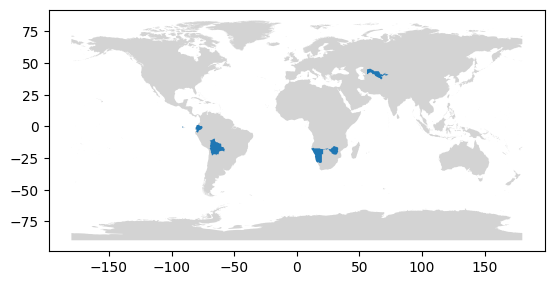

In [36]:
base=worldBorders.plot(color='lightgrey')
bestCountries.plot(ax=base)

Now saving all info in geopackage files:

In [39]:
import os

countriesCIA.info()

countriesCIA.to_file('maps/countriesCIA.gpkg', driver='GPKG', layer='cia')
worldBorders.to_file('maps/countriesCIA.gpkg', driver='GPKG', layer='border')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COUNTRY               147 non-null    object  
 1   name                  147 non-null    object  
 2   region                147 non-null    object  
 3   obesityAdults_rate    147 non-null    float64 
 4   TobaccoUse_perc       147 non-null    float64 
 5   Alcohol_LitersPerCap  147 non-null    float64 
 6   tobacco_code          147 non-null    int64   
 7   tobacco_levels        147 non-null    object  
 8   tobacco_custom        147 non-null    object  
 9   alcohol_code          147 non-null    int64   
 10  alcohol_levels        147 non-null    object  
 11  geometry              147 non-null    geometry
 12  obesity_code          147 non-null    int64   
 13  obesity_levels        147 non-null    object  
dtypes: float64(3), geometry(1), int64(3), object(7)
me